In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import no_uncertainty
import robust_uncertainty
import numpy as np

In [31]:
iter=600
mu_d = 13.0
gan = 15.0
beta = 0.95
sig = -1e-1

rho = 0.05
c_d = 1.
ponji = 1e-9
seed = 7

array([[-2.68241472,  0.05249344,  0.05263158]])

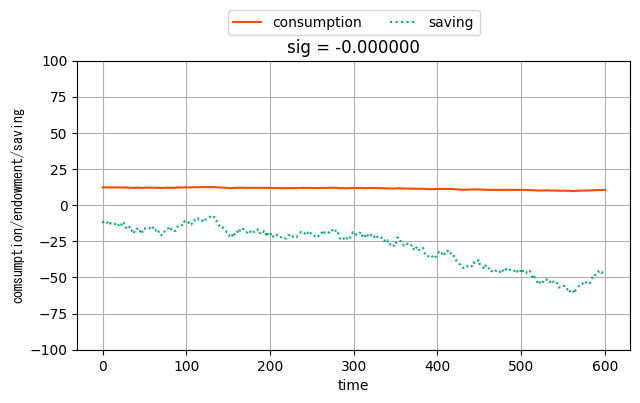

In [32]:
lq = no_uncertainty.no_mis(rho, mu_d, gan, c_d, beta, ponji=ponji, iter=iter, seed=seed)
lq.plt_c_k_d(d_plot=False,y_lim=True)
lq.state_transition()
lq.olrprobust()[0]

nomis=[12.31758528 12.40632679 12.38186814 12.38359098 12.40498291]
mis=[12.00385498 12.12141889 12.11181925 12.13152235 12.17307371]
19
nomis util = -54.283442263874015
mis util = -54.28344226387741
ganmma = 15.0
mean of consumption w\o mis = 11.498738529194366
mean of consumption w\ mis  = 13.765236659769975
Dp_nomis=
[[ 1.43906973e+02 -2.81618343e+00 -2.82359444e+00]
 [-2.81618343e+00  5.51112218e-02  5.52562514e-02]
 [-2.82359444e+00  5.52562514e-02  5.54016626e-02]]
Dp_mis=
[[ 1.61733651e+02 -3.16504210e+00 -3.17337116e+00]
 [-3.16504210e+00  6.19382016e-02  6.21011969e-02]
 [-3.17337116e+00  6.21011969e-02  6.22646211e-02]]


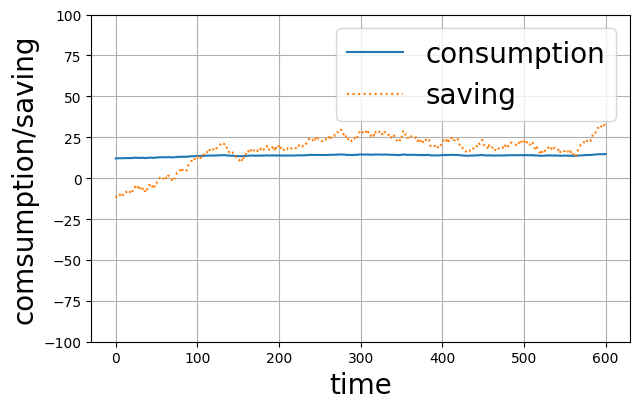

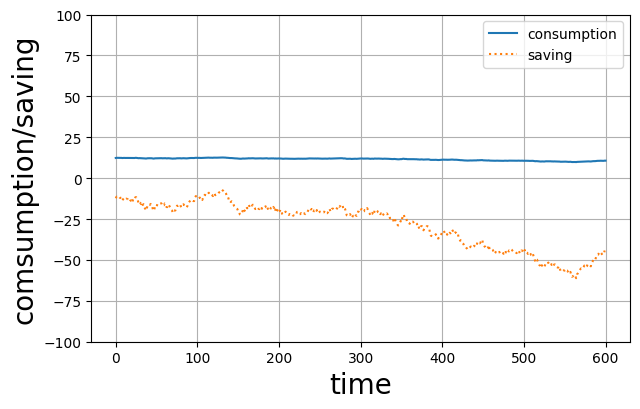

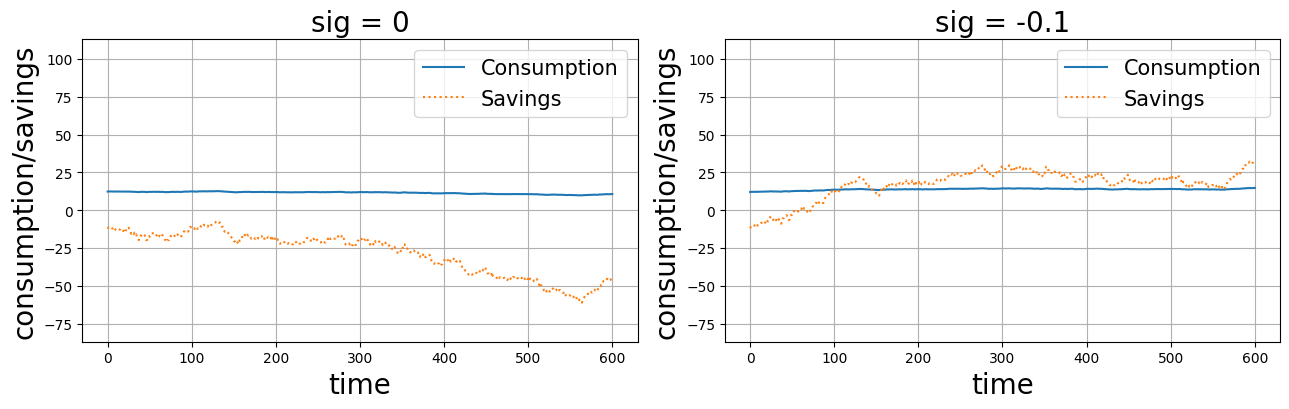

In [33]:
rolq = robust_uncertainty.mis(
    rho, mu_d, gan, c_d, sig, beta, ponji=ponji, iter=iter, seed=seed
)
y_mis,_,_,c_mis=rolq.state_transition()
_,_,_,c_nomis=rolq.nomis_state_transition()
print(f"nomis={c_nomis[:5]}")
print(f"mis={c_mis[:5]}")
i=0
while i<len(c_mis):
    if c_mis[i]>c_nomis[i]:
        print(i)
        break
    i=i+1
rolq.mis_plot_time_series(d_plot=False, y_lim=True,size=False)
rolq.nomis_plot_time_series(d_plot=False, y_lim=True,size=False)
# rolq.compare_discounted_utilities()
print(f"nomis util = {rolq.compare_discounted_utilities()[0][-1]}")
print(f"mis util = {rolq.compare_discounted_utilities()[1][-1]}")
# rolq.plot_immediate_payoff()
# rolq.plot_discounted_utility()
# rolq.plot_compare_consumption()
# rolq.plot_savings_per_period()
rolq.plot_consumption_and_savings_comparison(d_plot=False, y_lim=True)
rolq.mean_consumption()
_,_,_,Dp_nomis=rolq.nomis_olrprobust()
_,_,_,Dp_mis=rolq.olrprobust()
print(f"Dp_nomis=\n{Dp_nomis}")
print(f"Dp_mis=\n{Dp_mis}")


In [34]:
_,K,_,_=rolq.olrprobust()
print(K)
print(f"w={K@y_mis[262]}")

[[-0.31455591  0.00615569  0.00617189]]
w=[-0.0746834]


In [36]:
#rolq.combine_plots(rows=3, cols=2)

In [ ]:
# 画像パスのリストを作成
#image_files = sorted(glob.glob('./plt_robust_uncertainty/*/*/combined_image.png'))
#print(image_files)
# 画像を開いてフレームリストに追加
#frames = [Image.open(image) for image in image_files]

# GIF を作成して保存
#frames[0].save('output.gif', format='GIF', append_images=frames[1:], save_all=True, duration=100, loop=0)

beta fix 13   
sig fix -0.01  
ganmma 0-13 diff 0.1

In [ ]:
def gif_diff_gamma():
    for ganmma in np.arange(0, 20, 1.):
        mit_lq=robust_uncertainty.mis(rho, mu_d, ganmma, c_d, sig, beta)
        mit_lq.combine_plots()

In [ ]:
#gif_diff_gamma()